# Q 1.1, 1.2 - Fitting Microsoft Corp.'s (MSFT) 5 Year Daily Historical Prices (10/15/2019 - 10/14/2024) from NASDAQ, to Geometric Brownian Motion (GBM) and Generalized AutoRegressive Conditional Heteroskedasticity (GARCH) (non-constant volatility) models

In [1]:
import pandas as pd
import numpy as np

# Load the historical stock price data
file_path = 'data\MSFT_5Y Hist_NASDAQ.csv'
msft_data = pd.read_csv(file_path)

# Display the first few rows to inspect the data
msft_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/15/2019,141.58,19917760,140.06,141.79,139.81
1,10/16/2019,140.41,20841690,140.79,140.99,139.53
2,10/17/2019,139.69,22102800,140.95,141.42,139.02
3,10/18/2019,137.41,32284430,139.76,140.00,136.56
4,10/21/2019,138.43,20716040,138.45,138.50,137.01


In [2]:
# Data Cleaning

# Step 1: Removing the dollar signs ($) from the price columns and converting them to numeric types - ALREADY DONE IN THE CSV
# Uncomment the following lines, if not pre-cleaned in the csv
# msft_data['Close/Last'] = msft_data['Close/Last'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# msft_data['Open'] = msft_data['Open'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# msft_data['High'] = msft_data['High'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# msft_data['Low'] = msft_data['Low'].replace({'\$': '', ',': ''}, regex=True).astype(float)


# Step 2: Converting the `Date` column to a proper date format.
msft_data['Date'] = pd.to_datetime(msft_data['Date'], format='%m/%d/%Y')

# Step 3: Sort by date in ascending order - ALREADY DONE IN THE CSV
# Uncomment the following lines, if not pre-sorted in the csv
# msft_data = msft_data.sort_values('Date').reset_index(drop=True)

# Check the cleaned data
msft_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2019-10-15,141.58,19917760,140.06,141.79,139.81
1,2019-10-16,140.41,20841690,140.79,140.99,139.53
2,2019-10-17,139.69,22102800,140.95,141.42,139.02
3,2019-10-18,137.41,32284430,139.76,140.00,136.56
4,2019-10-21,138.43,20716040,138.45,138.50,137.01


In [3]:
# Calculate daily returns
msft_data['Returns'] = msft_data['Close/Last'].pct_change().dropna()

# Drop NaN values that resulted from percentage change calculation
msft_data = msft_data.dropna()

# Display the updated dataset with returns
msft_data.head()

,Date,Close/Last,Volume,Open,High,Low,Returns
1,2019-10-16,140.41,20841690,140.79,140.99,139.53,-0.008264
2,2019-10-17,139.69,22102800,140.95,141.42,139.02,-0.005128
3,2019-10-18,137.41,32284430,139.76,140.00,136.56,-0.016322
4,2019-10-21,138.43,20716040,138.45,138.50,137.01,0.007423
5,2019-10-22,136.37,27935270,138.97,140.01,136.26,-0.014881


In [4]:
# GBM model fit - Calculating drift (μ) and volatility (σ)
dt = 1 # define dt as 1 for daily returns
returns = msft_data['Returns']
mu = np.mean(returns) / dt
sigma = np.std(returns) / np.sqrt(dt)

# Display the drift (mu) and volatility (sigma) for GBM
print("Drift (mu):", mu)
print("Volatility (sigma):", sigma)

Drift (mu): 0.0010458094639381103
Volatility (sigma): 0.019072355917688664


In [5]:
# GARCH(1,1) model fit on the returns
!pip install arch

from arch import arch_model
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Print the summary of the GARCH model
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16258366941.499556
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3372.4809124487274
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3372.4809121814774
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3372.48
Distribution:                  Normal   AIC:                          -6736.96
Method:            Maximum Likelihood   BIC:                          -6716.42
                                        No. Observations:                 1257
Date:                Fri, Nov 01 2024   Df Residuals:                     1256
Time:       

C:\Users\acer\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003638. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# Q 1.3 - Showing Volatility Smile for MSFT's (available) Option Chain for November 2024, taken from NASDAQ

   Exp. Date  Calls_Last Calls_Change  Calls_Bid  Calls_Ask   Calls_Vol  \
0  11/1/2024      185.20          NaN      175.8      178.75        NaN   
1  11/1/2024      170.40      -21.49       165.8      168.75        1.0   
2  11/1/2024      158.85      -18.90       155.8      158.65      100.0   
3  11/1/2024      167.82          NaN      145.8      148.75        NaN   
4  11/1/2024      152.94          NaN      135.8      138.75        NaN   

   Calls_OpenInt  Strike  Puts_Last Puts_Change  Puts_Bid  Puts_Ask  Puts_Vol  \
0            3.0   230.0       0.01         NaN       NaN      0.01       NaN   
1            4.0   240.0       0.01         NaN       NaN      0.01       NaN   
2           60.0   250.0        NaN         NaN       NaN      0.18       NaN   
3           11.0   260.0        NaN         NaN       NaN      0.37       NaN   
4            1.0   270.0       0.02         NaN       NaN      0.48       NaN   

   Puts_OpenInt  
0          36.0  
1          46.0  
2       

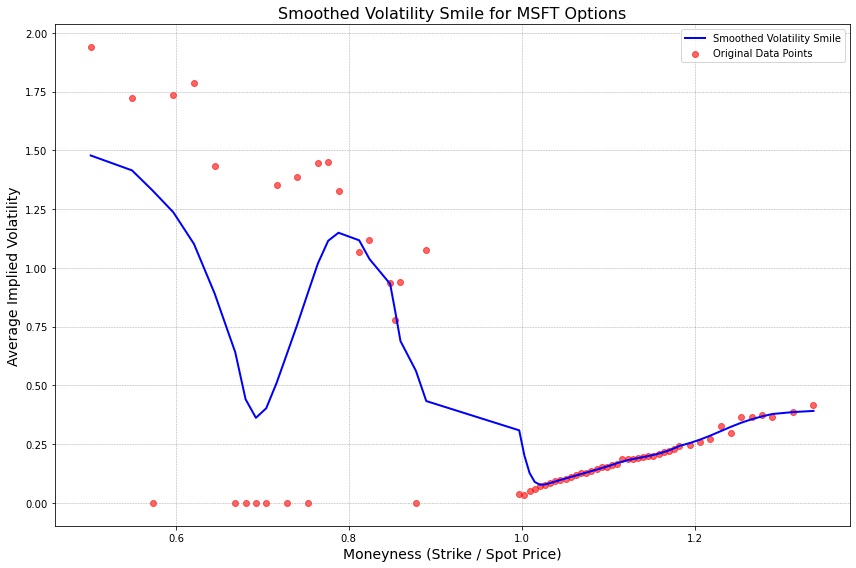

In [6]:
from datetime import datetime
from scipy.stats import norm
from scipy.optimize import brentq
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

# Load the options data
options_data = pd.read_csv('data/MSFT_Option_Chain_NASDAQ.csv')

# Display first few rows to understand the data structure
print(options_data.head())

# Parameters
spot_price = 418.74  # Last closing price for 10/15/2024 (NASDAQ) (in USD). To be adjusted accordingly, based on current date.
risk_free_rate = 0.05  # Assuming a 5% risk-free rate, adjust if you have a different estimate

# Black-Scholes formula for European Call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate implied volatility
def implied_volatility_call(price, S, K, T, r):
    # Using a root-finding method to get implied volatility by equating BS price to market price
    try:
        implied_vol = brentq(lambda sigma: black_scholes_call(S, K, T, r, sigma) - price, 1e-6, 5.0)
        return implied_vol
    except ValueError:
        return np.nan  # Return NaN if no solution found
    
# Convert 'Exp. Date' column to datetime format and calculate 'Days Until Expiration'
options_data['Exp. Date'] = pd.to_datetime(options_data['Exp. Date'], format='%m/%d/%Y')
today = datetime(2024, 10, 15) # Hardcoded today's date as 10/15/2024 (October 15, 2024). Ideally, use the line below by uncommenting it (and commenting this one out) so as not to hardcode today's date.
# today = datetime.now()
options_data['Days Until Expiration'] = (options_data['Exp. Date'] - today).dt.days
options_data = options_data[options_data['Days Until Expiration'] > 0]  # Filter for future expirations    

# Calculate implied volatilities for each option in the data
options_data['Implied Volatility'] = options_data.apply(
    lambda row: implied_volatility_call(
        price=row['Calls_Last'], 
        S=spot_price,
        K=row['Strike'],
        T=row['Days Until Expiration'] / 365,
        r=risk_free_rate
    ),
    axis=1
)

# Calculate moneyness (K/S)
options_data['Moneyness'] = options_data['Strike'] / spot_price

# Drop rows where implied volatility could not be calculated
options_data = options_data.dropna(subset=['Implied Volatility'])

# Group by Moneyness and calculate the average implied volatility for each unique moneyness
moneyness_vs_iv = options_data.groupby('Moneyness')['Implied Volatility'].mean().reset_index()

# Apply Gaussian smoothing for a more stable, smoothed curve (excess fluctuations/noise removed)
x = moneyness_vs_iv['Moneyness']
y = moneyness_vs_iv['Implied Volatility']
y_smooth = gaussian_filter1d(y, sigma=2)  # Adjust sigma to control smoothing intensity

# Plot the Smoothed Volatility Smile (plot visuals enhanced by adjusting colors, line styles, and adding gridlines for readability)
plt.figure(figsize=(12, 8))
plt.plot(x, y_smooth, color='blue', linewidth=2, label='Smoothed Volatility Smile')
plt.scatter(x, y, color='red', alpha=0.6, label='Original Data Points')  # Show original data points for reference
plt.xlabel('Moneyness (Strike / Spot Price)', fontsize=14)
plt.ylabel('Average Implied Volatility', fontsize=14)
plt.title('Smoothed Volatility Smile for MSFT Options', fontsize=16)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# Q 1.4 - Constructing term structure of the volatility

  Maturity Bucket  Implied Volatility
0        (14, 21]            0.403812
1        (21, 28]            0.367103
2        (28, 35]            1.938767


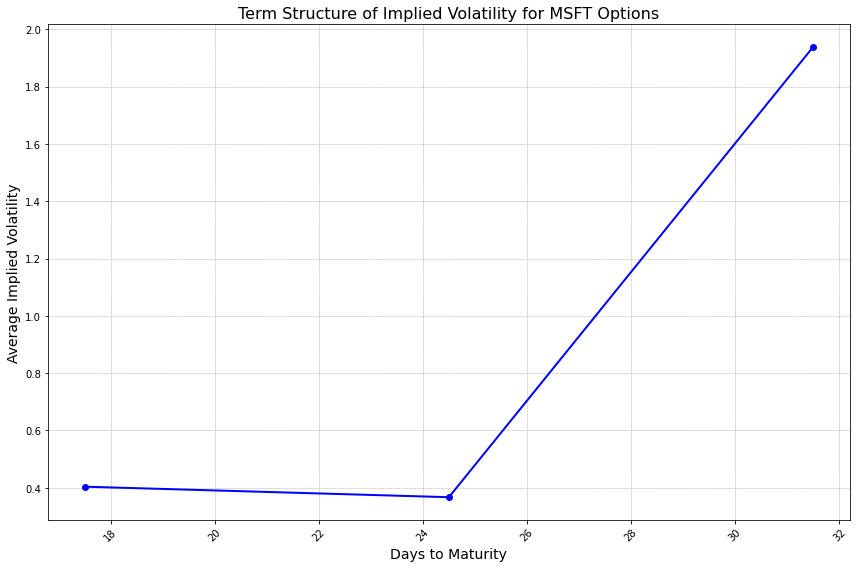

In [7]:
# Set up time-to-maturity buckets (e.g., 7-day (1-week) intervals up to 360 days)
# Define time buckets in days, or can be adjusted as necessary for finer intervals
options_data['Maturity Bucket'] = pd.cut(options_data['Days Until Expiration'], bins=np.arange(0, 361, 7))

# Calculate the average implied volatility for each maturity bucket
term_structure = options_data.groupby('Maturity Bucket')['Implied Volatility'].mean().dropna().reset_index()

# Display the term structure DataFrame to inspect its content
print(term_structure)

# Define the mid-point of each bucket for plotting purposes
term_structure['Days to Maturity'] = term_structure['Maturity Bucket'].apply(lambda x: x.mid)

# Plot the term structure
plt.figure(figsize=(12, 8))
plt.plot(term_structure['Days to Maturity'], term_structure['Implied Volatility'], marker='o', color='blue', linewidth=2)
plt.xlabel('Days to Maturity', fontsize=14)
plt.ylabel('Average Implied Volatility', fontsize=14)
plt.title('Term Structure of Implied Volatility for MSFT Options', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

Note that our MSFT options data initially only contained the option chain expiring on November 1, 2024, which is why the term structure plot was showing only a single point. With data from only one expiration date, there wouldn't be enough variation in the maturity buckets to create a meaningful average implied volatility plot. 

One solution is to use additional expiration dates as the term structure of implied volatility is typically constructed using options that expire over a range of maturities. This is what we did eventually. 

But if we had to stick to a single day option chain, we could adjust the analysis to focus on the implied volatility as a function of moneyness (Q1.3) as this would still provide valuable insights. 

Also note that Q 1.5 wouldn't work with a single day maturity, for the same reason.

# Q 1.5 - Plotting the volatility surface, as a function of time to maturity and moneyness

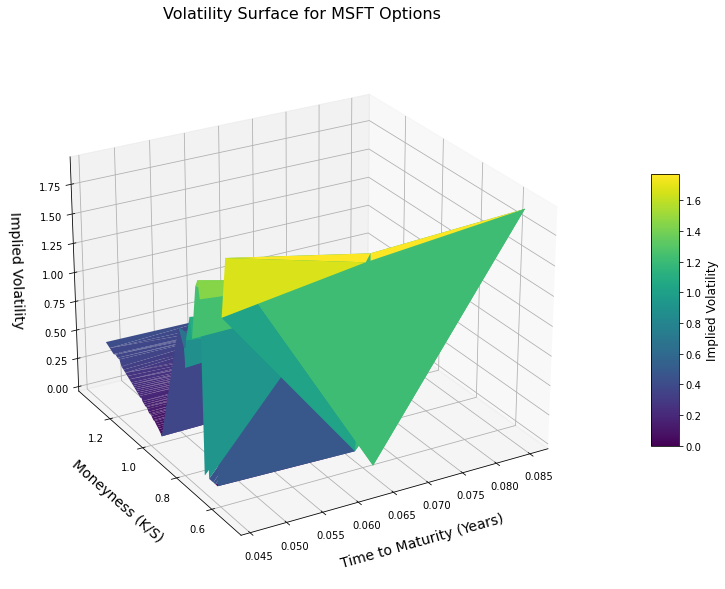

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D surface plotting
maturities = options_data['Days Until Expiration'].astype('int') / 365  # Convert days to years
moneyness = options_data['Moneyness']
implied_vol = options_data['Implied Volatility']

# Set up the 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a refined color map and no edge colors for a smoother, polished appearance
surf = ax.plot_trisurf(
    maturities, moneyness, implied_vol, cmap='viridis', linewidth=0.2, antialiased=True
)

# Set and customize labels and title for better readability
ax.set_xlabel('Time to Maturity (Years)', fontsize=14, labelpad=15)
ax.set_ylabel('Moneyness (K/S)', fontsize=14, labelpad=15)
ax.set_zlabel('Implied Volatility', fontsize=14, labelpad=15)
ax.set_title('Volatility Surface for MSFT Options', fontsize=16, pad=20)

# Customize tick sizes for better visibility
ax.tick_params(axis='x', labelsize=10, pad=5)
ax.tick_params(axis='y', labelsize=10, pad=5)
ax.tick_params(axis='z', labelsize=10, pad=5)

# Set a refined viewing angle
ax.view_init(elev=25, azim=240)

# Add a color bar for implied volatility scale
cbar = fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Implied Volatility', fontsize=12)

# Add grid lines to enhance readability
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()


# Q 2.1 - Vanilla European Call Option pricing using the GARCH(1,1) model and Monte Carlo simulation

Simulations: 100, Monte Carlo Price with GARCH model: 39.6922, Time taken: 1.35 seconds
Simulations: 1000, Monte Carlo Price with GARCH model: 37.2530, Time taken: 11.57 seconds
Simulations: 10000, Monte Carlo Price with GARCH model: 37.0017, Time taken: 120.73 seconds
Simulations: 100000, Monte Carlo Price with GARCH model: 37.6479, Time taken: 1394.67 seconds


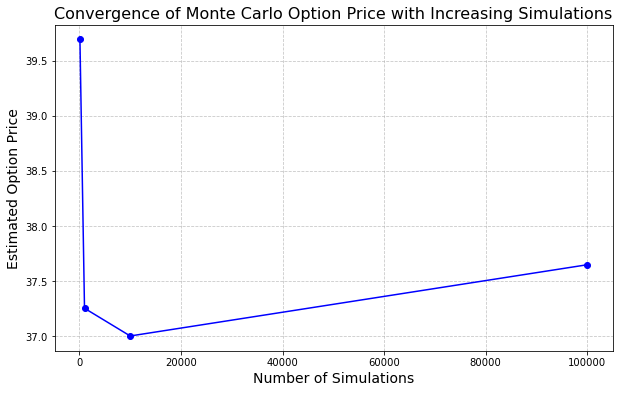

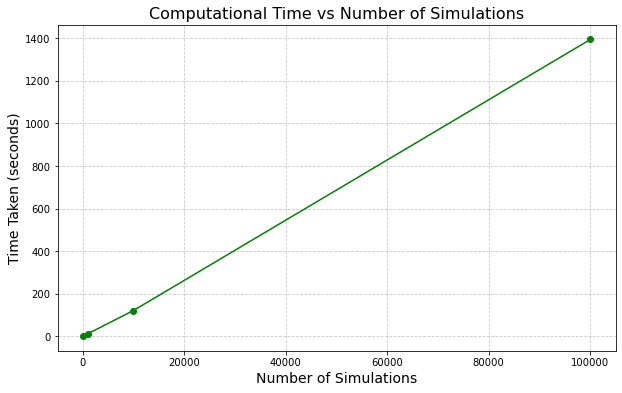

In [25]:
from numpy.random import normal
import time

# Parameters for the Monte Carlo simulation
simulations = [100, 1000, 10000, 100000] # Number of simulated paths to test
prices = []
times = []
num_steps = 250  # Steps in a year for daily data

# Option parameters
strike_price = 417.50  # Adjust to the options data's closest available strike price to $418.74 (today's - 10/15/2024 - last / closing price) to approximate an At-The-Money (ATM) option
# Here we find it is $417.50 for both 11/1/2024 and 11/8/2024. Which expiration date to choose to calculate T (time to expiration in years)?

# Approach 1: Near-term expiration (11/1/2024):
# To capture short-term volatility behavior and potential quick convergence in our Monte Carlo simulation, choosing the closer expiration date would be more practical. The shorter time frame generally leads to faster convergence in Monte Carlo simulations due to fewer steps.

# Approach 2: Longer-term expiration (11/8/2024):
# To incorporate more time decay and observe how volatility might change over a longer period, selecting the expiration further out would be appropriate.

# We choose Approach 1 here

# Set the expiration date for chosen approach (11/1/2024)
expiration_date = datetime(2024, 11, 1)

# Calculate days to expiration
days_to_expiration = (expiration_date - today).days

T = days_to_expiration / 365  # Time to expiration in years
dt = T / num_steps

initial_price = spot_price

# Simulate the paths
for num_sim in simulations:
    start_time = time.time()
    simulated_prices = np.zeros(num_sim)
    
    # Run the simulation with `num_sim` paths
    for i in range(num_sim):
        path = [initial_price]
        vol_path = garch_fit.conditional_volatility.iloc[-1] # Start from the latest fitted GARCH volatility
        
        for _ in range(num_steps):
            z = normal(0, 1)
            vol_path = np.sqrt(garch_fit.params['omega'] + 
                               garch_fit.params['alpha[1]'] * (z ** 2) +
                               garch_fit.params['beta[1]'] * vol_path ** 2)
            price_step = path[-1] * np.exp((mu - 0.5 * vol_path ** 2) * dt + vol_path * np.sqrt(dt) * z)
            path.append(price_step)
        
        simulated_prices[i] = max(0, path[-1] - strike_price) # Payoff for the Vanilla European Call Option
    
    # Calculate the discounted payoff to get the option price
    monte_carlo_price = np.exp(-risk_free_rate * T) * np.mean(simulated_prices)
    end_time = time.time()
    
    # Record the price and time taken
    prices.append(monte_carlo_price)
    times.append(end_time - start_time)

    print(f"Simulations: {num_sim}, Monte Carlo Price with GARCH model: {monte_carlo_price:.4f}, Time taken: {times[-1]:.2f} seconds")

# Plot the convergence of option price with number of simulations
plt.figure(figsize=(10, 6))
plt.plot(simulations, prices, marker='o', color='blue')
plt.xlabel('Number of Simulations', fontsize=14)
plt.ylabel('Estimated Option Price', fontsize=14)
plt.title('Convergence of Monte Carlo Option Price with Increasing Simulations', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot time taken vs number of simulations
plt.figure(figsize=(10, 6))
plt.plot(simulations, times, marker='o', color='green')
plt.xlabel('Number of Simulations', fontsize=14)
plt.ylabel('Time Taken (seconds)', fontsize=14)
plt.title('Computational Time vs Number of Simulations', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

To show how accuracy improves with increased computational time in our Monte Carlo simulation, we can vary the number of simulations (num_simulations) and observe its effect on the resulting option price's stability and precision. In Monte Carlo methods, the accuracy improves as we increase the number of simulated paths, but this comes at the cost of longer computational time. Here’s the stepwise approach we take:

1. Run Simulations with Different Sample Sizes (such as 100, 1,000, 10,000, and 100,000) and record the option price output for each.


2. Record and Compare Execution Time for each simulation set using Python’s time module. We observe that as the number of simulations increases, the estimated option price stabilizes, but the computational time also grows.


3. Analyze the Accuracy-Stability Relationship by plotting the option prices calculated with varying numbers of simulations to visualize convergence. Ideally, we should see the option price fluctuating initially but stabilizing around the “true” value as we increase num_simulations.